## 2017 Hurricane Tracks

Demonstrates how to plot all the North American hurricane tracks in 2017, starting from the BigQuery public dataset.

In [ ]:
%bash
apt-get update
apt-get -y install python-mpltoolkits.basemap 

In [1]:
from mpl_toolkits.basemap import Basemap
import google.datalab.bigquery as bq
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
query="""
#standardSQL
SELECT
  name,
  latitude,
  longitude,
  iso_time,
  usa_sshs
FROM
  `bigquery-public-data.noaa_hurricanes.hurricanes`
WHERE
  basin = 'NA'
  AND season = '2017'
"""

df = bq.Query(query).execute().result().to_dataframe()

In [3]:
df.head()

,name,latitude,longitude,iso_time,usa_sshs
0,DON,11.0,-52.3,2017-07-17 18:00:00,0
1,DON,11.4,-57.0,2017-07-18 12:00:00,0
2,DON,11.2,-53.8,2017-07-18 00:00:00,0
3,DON,11.9,-61.4,2017-07-19 00:00:00,0
4,DON,11.6,-58.9,2017-07-18 18:00:00,0


### Plot one of the hurricanes

Let's just plot the track of Hurricane MARIA

In [4]:
maria = df[df['name'] == 'MARIA'].sort_values('iso_time')

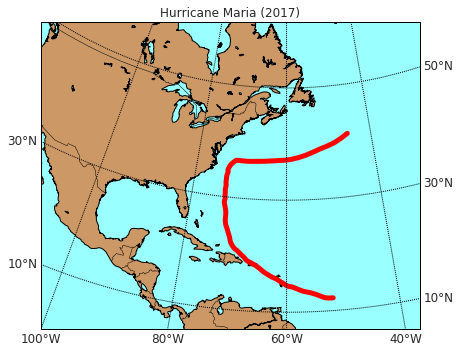

In [17]:
m = Basemap(llcrnrlon=-100.,llcrnrlat=0.,urcrnrlon=-20.,urcrnrlat=57.,
            projection='lcc',lat_1=20.,lat_2=40.,lon_0=-60.,
            resolution ='l',area_thresh=1000.)
x, y = m(maria['longitude'].values,maria['latitude'].values)
m.plot(x,y,linewidth=5,color='r')

# draw coastlines, meridians and parallels.
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.drawparallels(np.arange(10,70,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(-100,0,20),labels=[0,0,0,1])
plt.title('Hurricane Maria (2017)');

### Plot all the hurricanes

Use line thickness based on the maximum category reached by the hurricane

In [25]:
names = df.name.unique()
names

array(['DON', 'LEE', 'BRET', 'GERT', 'IRMA', 'JOSE', 'NATE', 'RINA',
       'CINDY', 'EMILY', 'KATIA', 'MARIA', 'ARLENE', 'HARVEY', 'OPHELIA',
       'FRANKLIN', 'PHILIPPE', 'NOT_NAMED'], dtype=object)

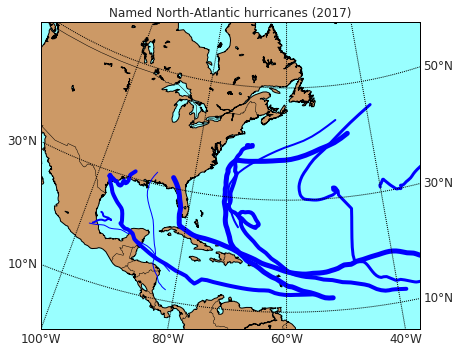

In [32]:
m = Basemap(llcrnrlon=-100.,llcrnrlat=0.,urcrnrlon=-20.,urcrnrlat=57.,
            projection='lcc',lat_1=20.,lat_2=40.,lon_0=-60.,
            resolution ='l',area_thresh=1000.)

for name in names:
  if name != 'NOT_NAMED':
    named = df[df['name'] == name].sort_values('iso_time')
    x, y = m(named['longitude'].values,named['latitude'].values)
    maxcat = max(named['usa_sshs'])
    m.plot(x,y,linewidth=maxcat,color='b')
   
# draw coastlines, meridians and parallels.
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.drawparallels(np.arange(10,70,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(-100,0,20),labels=[0,0,0,1])
plt.title('Named North-Atlantic hurricanes (2017)');

Copyright 2017 Google Inc. Licensed under the Apache License, Version 2.0 (the \"License\"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an \"AS IS\" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License